In [1]:
# from graphframes import *
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
from pyspark.sql.functions import isnan, when, count, col
from statsmodels.tsa.seasonal import seasonal_decompose

from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

from numpy import exp
from scipy.special import factorial


import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.offline as offline
from plotly.offline import plot
from pyspark.mllib.stat import Statistics

# import plotly.plotly as py
# import plotly.graph_objs as go
import pandas as pd
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)



Reading the data through SparkSQL

In [3]:
df = spark.sql("select * from crimes___2001_to_present_9be1b_csv")
display(df.select("*"))

ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
10000092,HY189866,03/18/2015 07:44:00 PM,047XX W OHIO ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,false,false,1111,011,28,25,04B,1144606,1903566,2015,02/10/2018 03:50:01 PM,41.891398861,-87.744384567,"(41.891398861, -87.744384567)"
10000094,HY190059,03/18/2015 11:00:00 PM,066XX S MARSHFIELD AVE,4625,OTHER OFFENSE,PAROLE VIOLATION,STREET,true,false,0725,007,15,67,26,1166468,1860715,2015,02/10/2018 03:50:01 PM,41.773371528,-87.665319468,"(41.773371528, -87.665319468)"
10000095,HY190052,03/18/2015 10:45:00 PM,044XX S LAKE PARK AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,false,true,0222,002,4,39,08B,1185075,1875622,2015,02/10/2018 03:50:01 PM,41.81386068,-87.596642837,"(41.81386068, -87.596642837)"
10000096,HY190054,03/18/2015 10:30:00 PM,051XX S MICHIGAN AVE,0460,BATTERY,SIMPLE,APARTMENT,false,false,0225,002,3,40,08B,1178033,1870804,2015,02/10/2018 03:50:01 PM,41.800802415,-87.622619343,"(41.800802415, -87.622619343)"
10000097,HY189976,03/18/2015 09:00:00 PM,047XX W ADAMS ST,031A,ROBBERY,ARMED: HANDGUN,SIDEWALK,false,false,1113,011,28,25,03,1144920,1898709,2015,02/10/2018 03:50:01 PM,41.878064761,-87.743354013,"(41.878064761, -87.743354013)"
10000098,HY190032,03/18/2015 10:00:00 PM,049XX S DREXEL BLVD,0460,BATTERY,SIMPLE,APARTMENT,false,false,0223,002,4,39,08B,1183018,1872537,2015,02/10/2018 03:50:01 PM,41.805443345,-87.604283976,"(41.805443345, -87.604283976)"
10000099,HY190047,03/18/2015 11:00:00 PM,070XX S MORGAN ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,false,true,0733,007,17,68,08B,1170859,1858210,2015,02/10/2018 03:50:01 PM,41.766402779,-87.649296123,"(41.766402779, -87.649296123)"
10000100,HY189988,03/18/2015 09:35:00 PM,042XX S PRAIRIE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,false,true,0213,002,3,38,08B,1178746,1876914,2015,02/10/2018 03:50:01 PM,41.817552577,-87.619818523,"(41.817552577, -87.619818523)"
10000101,HY190020,03/18/2015 10:09:00 PM,036XX S WOLCOTT AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,true,false,0912,009,11,59,18,1164279,1880656,2015,02/10/2018 03:50:01 PM,41.828138428,-87.672782106,"(41.828138428, -87.672782106)"
10000104,HY189964,03/18/2015 09:25:00 PM,097XX S PRAIRIE AVE,0460,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,false,false,0511,005,6,49,08B,1179637,1840444,2015,02/10/2018 03:50:01 PM,41.71745472,-87.617663257,"(41.71745472, -87.617663257)"


Checking column datatypes

In [5]:
type(df)
df.dtypes

Out[ 4 ]: 
[('ID', 'string'),
 ('Case Number', 'string'),
 ('Date', 'string'),
 ('Block', 'string'),
 ('IUCR', 'string'),
 ('Primary Type', 'string'),
 ('Description', 'string'),
 ('Location Description', 'string'),
 ('Arrest', 'string'),
 ('Domestic', 'string'),
 ('Beat', 'string'),
 ('District', 'string'),
 ('Ward', 'string'),
 ('Community Area', 'string'),
 ('FBI Code', 'string'),
 ('X Coordinate', 'string'),
 ('Y Coordinate', 'string'),
 ('Year', 'string'),
 ('Updated On', 'string'),
 ('Latitude', 'string'),
 ('Longitude', 'string'),
 ('Location', 'string')]

Count of crimes by year

In [7]:
df.groupBy("Year").count().show()

+----+------+
Year| count|
+----+------+
2016|268641|
2012|335877|
2017|267461|
2014|275082|
2013|306969|
2005|453698|
2002|486750|
2009|392647|
2018|141344|
2006|448087|
2004|469374|
2011|351722|
2008|427024|
2007|436986|
2015|263804|
2001|485744|
2010|370272|
2003|475932|
+----+------+

Count of Crime Types

In [9]:
crime_types=df.groupBy("Primary Type").count().show()
type(crime_types)

+--------------------+-------+
 Primary Type| count|
+--------------------+-------+
OFFENSE INVOLVING...| 44555|
 STALKING| 3310|
PUBLIC PEACE VIOL...| 47351|
 OBSCENITY| 547|
NON-CRIMINAL (SUB...| 8|
 ARSON| 11020|
 DOMESTIC VIOLENCE| 1|
 GAMBLING| 14339|
 CRIMINAL TRESPASS| 191167|
 ASSAULT| 411780|
 NON - CRIMINAL| 38|
LIQUOR LAW VIOLATION| 13968|
 MOTOR VEHICLE THEFT| 310950|
 THEFT|1395537|
 BATTERY|1215731|
 ROBBERY| 252444|
 HOMICIDE| 9209|
 RITUALISM| 23|
 PUBLIC INDECENCY| 158|
 CRIM SEXUAL ASSAULT| 26461|
+--------------------+-------+
only showing top 20 rows

 Out[ 6 ]: NoneType

Count of crimes by Location

In [11]:

crime_location  = df.groupBy("Location Description").count().collect()
location = [item[0] for item in crime_location]
count = [item[1] for item in crime_location]
crime_location = {"location" : location, "count": count}
crime_location = pd.DataFrame(crime_location)
crime_location = crime_location.sort_values(by = "count", ascending  = False)
crime_location

Out[ 7 ]: 
 count location
62 1750419 STREET
99 1127820 RESIDENCE
129 686276 APARTMENT
5 657521 SIDEWALK
130 252794 OTHER
172 191247 PARKING LOT/GARAGE(NON.RESID.)
118 149042 ALLEY
82 141374 SCHOOL, PUBLIC, BUILDING
47 130227 RESIDENCE-GARAGE
92 116913 SMALL RETAIL STORE
122 116384 RESIDENCE PORCH/HALLWAY
91 106434 VEHICLE NON-COMMERCIAL
125 103278 RESTAURANT
44 86206 GROCERY FOOD STORE
111 82152 DEPARTMENT STORE
89 70842 GAS STATION
126 67563 RESIDENTIAL YARD (FRONT/BACK)
149 55271 CHA PARKING LOT/GROUNDS
121 51568 PARK PROPERTY
75 48555 COMMERCIAL / BUSINESS OFFICE
36 35938 CTA PLATFORM
93 35783 CHA APARTMENT
168 35242 BAR OR TAVERN
110 30228 DRUG STORE
16 28704 SCHOOL, PUBLIC, GROUNDS
138 27538 HOTEL/MOTEL
43 27120 BANK
60 24782 CHA HALLWAY/STAIRWELL/ELEVATOR
112 23679 VACANT LOT/LAND
135 23259 CTA TRAIN
.. ... ...
152 3 COACH HOUSE
117 3 CHA BREEZEWAY
142 3 VEHICLE-COMMERCIAL - ENTERTAINMENT/PARTY BUS
100 3 CHA PLAY LOT
166 2 PRAIRIE
86 2 GOVERNMENT BUILDING
178 2 LIVERY STAND OFFICE
114 2 FACTORY
19 2 FARM
22 2 ROOMING HOUSE
28 2 COUNTY JAIL
116 2 CHURCH PROPERTY
179 2 CTA "L" TRAIN
74 2 CHA ELEVATOR
52 2 PUBLIC HIGH SCHOOL
81 2 LAUNDRY ROOM
85 1 HORSE STABLE
103 1 POOLROOM
2 1 EXPRESSWAY EMBANKMENT
144 1 FUNERAL PARLOR
7 1 PUBLIC GRAMMAR SCHOOL
10 1 TRUCKING TERMINAL
96 1 CLEANERS/LAUNDROMAT
58 1 JUNK YARD/GARBAGE DUMP
56 1 ELEVATOR
50 1 KENNEL
134 1 LAGOON
77 1 LIVERY AUTO
87 1 BANQUET HALL
150 1 LOADING DOCK

[180 rows x 2 columns]

Perform Dickey-Fuller Test to check if the given time series data is stationary by plotting the rolling mean and standard deviation

Converting String Date column to datetime object

In [14]:
from datetime import datetime
from pyspark.sql.functions import to_timestamp,to_date
df= df.withColumn("new_date",to_date(df.Date, "mm/dd/yyyy HH:mm:ss"))

display(df.select('*'))


ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,new_date
10000092,HY189866,03/18/2015 07:44:00 PM,047XX W OHIO ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,false,false,1111,011,28,25,04B,1144606,1903566,2015,02/10/2018 03:50:01 PM,41.891398861,-87.744384567,"(41.891398861, -87.744384567)",2015-01-18
10000094,HY190059,03/18/2015 11:00:00 PM,066XX S MARSHFIELD AVE,4625,OTHER OFFENSE,PAROLE VIOLATION,STREET,true,false,0725,007,15,67,26,1166468,1860715,2015,02/10/2018 03:50:01 PM,41.773371528,-87.665319468,"(41.773371528, -87.665319468)",2015-01-18
10000095,HY190052,03/18/2015 10:45:00 PM,044XX S LAKE PARK AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,false,true,0222,002,4,39,08B,1185075,1875622,2015,02/10/2018 03:50:01 PM,41.81386068,-87.596642837,"(41.81386068, -87.596642837)",2015-01-18
10000096,HY190054,03/18/2015 10:30:00 PM,051XX S MICHIGAN AVE,0460,BATTERY,SIMPLE,APARTMENT,false,false,0225,002,3,40,08B,1178033,1870804,2015,02/10/2018 03:50:01 PM,41.800802415,-87.622619343,"(41.800802415, -87.622619343)",2015-01-18
10000097,HY189976,03/18/2015 09:00:00 PM,047XX W ADAMS ST,031A,ROBBERY,ARMED: HANDGUN,SIDEWALK,false,false,1113,011,28,25,03,1144920,1898709,2015,02/10/2018 03:50:01 PM,41.878064761,-87.743354013,"(41.878064761, -87.743354013)",2015-01-18
10000098,HY190032,03/18/2015 10:00:00 PM,049XX S DREXEL BLVD,0460,BATTERY,SIMPLE,APARTMENT,false,false,0223,002,4,39,08B,1183018,1872537,2015,02/10/2018 03:50:01 PM,41.805443345,-87.604283976,"(41.805443345, -87.604283976)",2015-01-18
10000099,HY190047,03/18/2015 11:00:00 PM,070XX S MORGAN ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,false,true,0733,007,17,68,08B,1170859,1858210,2015,02/10/2018 03:50:01 PM,41.766402779,-87.649296123,"(41.766402779, -87.649296123)",2015-01-18
10000100,HY189988,03/18/2015 09:35:00 PM,042XX S PRAIRIE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,false,true,0213,002,3,38,08B,1178746,1876914,2015,02/10/2018 03:50:01 PM,41.817552577,-87.619818523,"(41.817552577, -87.619818523)",2015-01-18
10000101,HY190020,03/18/2015 10:09:00 PM,036XX S WOLCOTT AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,true,false,0912,009,11,59,18,1164279,1880656,2015,02/10/2018 03:50:01 PM,41.828138428,-87.672782106,"(41.828138428, -87.672782106)",2015-01-18
10000104,HY189964,03/18/2015 09:25:00 PM,097XX S PRAIRIE AVE,0460,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,false,false,0511,005,6,49,08B,1179637,1840444,2015,02/10/2018 03:50:01 PM,41.71745472,-87.617663257,"(41.71745472, -87.617663257)",2015-01-18


Deriving Month, Hour and day of the week from the Date column

In [16]:

from pyspark.sql.functions import year, month, dayofmonth, hour, dayofweek
df= df.withColumn('hour', hour(df['new_date']))
df=df.withColumn("Month",month(df["new_date"]))
df=df.withColumn("New_Year",year(df["new_date"]))
df=df.withColumn('week_day', dayofweek(df['new_date']))
display(df.select('*'))


ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,new_date,hour,Month,New_Year,week_day
10000092,HY189866,03/18/2015 07:44:00 PM,047XX W OHIO ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,false,false,1111,011,28,25,04B,1144606,1903566,2015,02/10/2018 03:50:01 PM,41.891398861,-87.744384567,"(41.891398861, -87.744384567)",2015-01-18,0,1,2015,1
10000094,HY190059,03/18/2015 11:00:00 PM,066XX S MARSHFIELD AVE,4625,OTHER OFFENSE,PAROLE VIOLATION,STREET,true,false,0725,007,15,67,26,1166468,1860715,2015,02/10/2018 03:50:01 PM,41.773371528,-87.665319468,"(41.773371528, -87.665319468)",2015-01-18,0,1,2015,1
10000095,HY190052,03/18/2015 10:45:00 PM,044XX S LAKE PARK AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,false,true,0222,002,4,39,08B,1185075,1875622,2015,02/10/2018 03:50:01 PM,41.81386068,-87.596642837,"(41.81386068, -87.596642837)",2015-01-18,0,1,2015,1
10000096,HY190054,03/18/2015 10:30:00 PM,051XX S MICHIGAN AVE,0460,BATTERY,SIMPLE,APARTMENT,false,false,0225,002,3,40,08B,1178033,1870804,2015,02/10/2018 03:50:01 PM,41.800802415,-87.622619343,"(41.800802415, -87.622619343)",2015-01-18,0,1,2015,1
10000097,HY189976,03/18/2015 09:00:00 PM,047XX W ADAMS ST,031A,ROBBERY,ARMED: HANDGUN,SIDEWALK,false,false,1113,011,28,25,03,1144920,1898709,2015,02/10/2018 03:50:01 PM,41.878064761,-87.743354013,"(41.878064761, -87.743354013)",2015-01-18,0,1,2015,1
10000098,HY190032,03/18/2015 10:00:00 PM,049XX S DREXEL BLVD,0460,BATTERY,SIMPLE,APARTMENT,false,false,0223,002,4,39,08B,1183018,1872537,2015,02/10/2018 03:50:01 PM,41.805443345,-87.604283976,"(41.805443345, -87.604283976)",2015-01-18,0,1,2015,1
10000099,HY190047,03/18/2015 11:00:00 PM,070XX S MORGAN ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,false,true,0733,007,17,68,08B,1170859,1858210,2015,02/10/2018 03:50:01 PM,41.766402779,-87.649296123,"(41.766402779, -87.649296123)",2015-01-18,0,1,2015,1
10000100,HY189988,03/18/2015 09:35:00 PM,042XX S PRAIRIE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,false,true,0213,002,3,38,08B,1178746,1876914,2015,02/10/2018 03:50:01 PM,41.817552577,-87.619818523,"(41.817552577, -87.619818523)",2015-01-18,0,1,2015,1
10000101,HY190020,03/18/2015 10:09:00 PM,036XX S WOLCOTT AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,true,false,0912,009,11,59,18,1164279,1880656,2015,02/10/2018 03:50:01 PM,41.828138428,-87.672782106,"(41.828138428, -87.672782106)",2015-01-18,0,1,2015,1
10000104,HY189964,03/18/2015 09:25:00 PM,097XX S PRAIRIE AVE,0460,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,false,false,0511,005,6,49,08B,1179637,1840444,2015,02/10/2018 03:50:01 PM,41.71745472,-87.617663257,"(41.71745472, -87.617663257)",2015-01-18,0,1,2015,1


In [17]:
crime_per_year=df.groupBy('New_Year').count()
display(crime_per_year.select('*'))

New_Year,count
2003,475932
2007,436986
2018,141344
2015,263804
2006,448087
2013,306969
2014,275082
2004,469374
2012,335877
2009,392647


Count of crimes by Date with indexing on Time Series Data

In [19]:
crime_per_date=df.groupBy('new_date').count().orderBy('new_date', ascending=True)
# crime_per_date = crime_per_date.set_index(pd.DatetimeIndex(crime_per_date['new_date']))
display(crime_per_date.select('*'))

new_date,count
2001-01-01,18939
2001-01-02,16008
2001-01-03,15864
2001-01-04,16037
2001-01-05,15939
2001-01-06,16075
2001-01-07,16331
2001-01-08,16192
2001-01-09,16011
2001-01-10,16124


In [20]:
import pandas as pd
# df_crime = crime_per_year.toPandas()
df_crime_date=crime_per_date.toPandas()

x = df_crime_date.set_index(pd.DatetimeIndex(df_crime_date['new_date']))
x=x['count']
x.head()


Out[ 12 ]: 
new_date
2001-01-01 18939
2001-01-02 16008
2001-01-03 15864
2001-01-04 16037
2001-01-05 15939
Name: count, dtype: int64

In [21]:
x.index


Out[ 13 ]: 
DatetimeIndex(['2001-01-01', '2001-01-02', '2001-01-03', '2001-01-04',
 '2001-01-05', '2001-01-06', '2001-01-07', '2001-01-08',
 '2001-01-09', '2001-01-10',
 ...
 '2018-01-22', '2018-01-23', '2018-01-24', '2018-01-25',
 '2018-01-26', '2018-01-27', '2018-01-28', '2018-01-29',
 '2018-01-30', '2018-01-31'],
 dtype='datetime64[ns]', name=u'new_date', length=558, freq=None)

Perform Dickey-Fuller Test to check if the given time series data is stationary by plotting the rolling mean and standard deviation

In [23]:
def  check_stationarity_graph(timeseries):
    
    # Determine rolling statistics (moving averages and variance)
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    # Plot rolling statistics:
#     orig = plt.plot(timeseries, color='blue',label='Original')
#     mean = plt.plot(rolmean, color='red', label='Rolling Mean')
#     std = plt.plot(rolstd, color='black', label = 'Rolling Std')
#     plt.legend(loc='best')
#     plt.title('Rolling Mean & Standard Deviation')
#     plt.show(block=False)
#     display()

    fig,ax = plt.subplots()
    ax.plot(timeseries,color='blue', label='Original')
    ax.plot(rolmean, color='red', label='Rolling Mean')
    ax.plot(rolstd,color='black', label = 'Rolling Std')
    ax.set_title('Rolling Mean & Standard Deviation')
    display(fig)

    
    # Perform Dickey-Fuller test:
def  check_stationarity_data(timeseries):
    print('Results of Dickey-Fuller Test:')
    y = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(y[0:4], 
                index = ['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in y[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

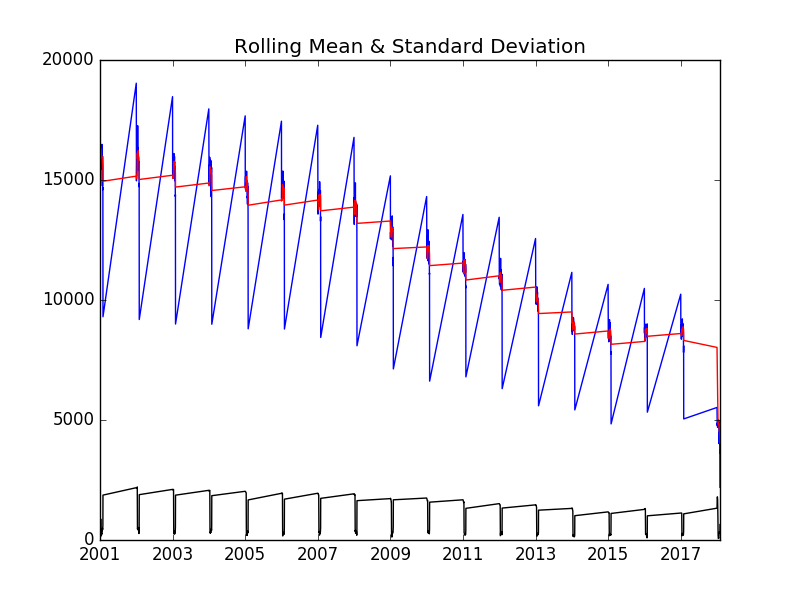

In [24]:

check_stationarity_graph(x)


Get p-value and t-statistics using Dickey-Fuller test for stationarity

In [26]:
check_stationarity_data(x)

Results of Dickey-Fuller Test:
Test Statistic 0.489843
p-value 0.984561
#Lags Used 6.000000
Number of Observations Used 551.000000
Critical Value (5%) -2.866800
Critical Value (1%) -3.442274
Critical Value (10%) -2.569571
dtype: float64

Visualizing crime time series data

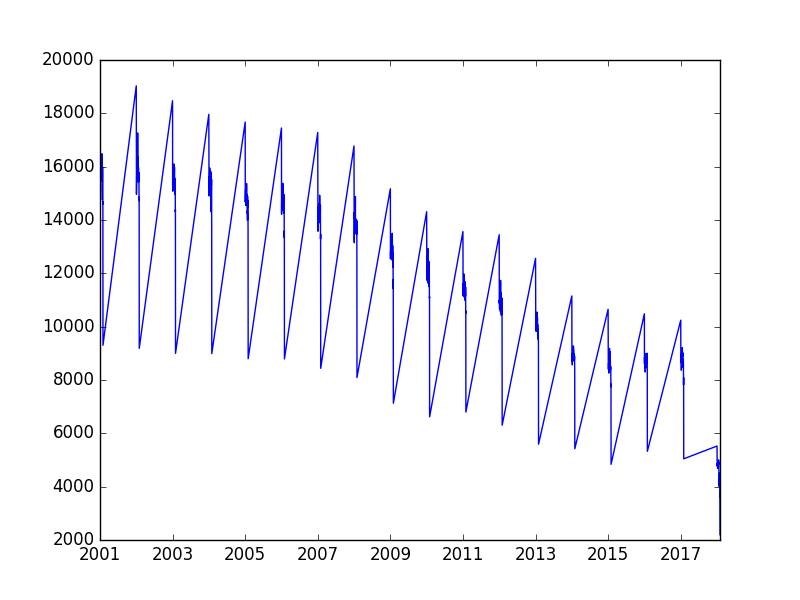

In [28]:
fig,ax = plt.subplots()
ax.plot(x)
display(fig)

Plotting data by taking log value of crimes

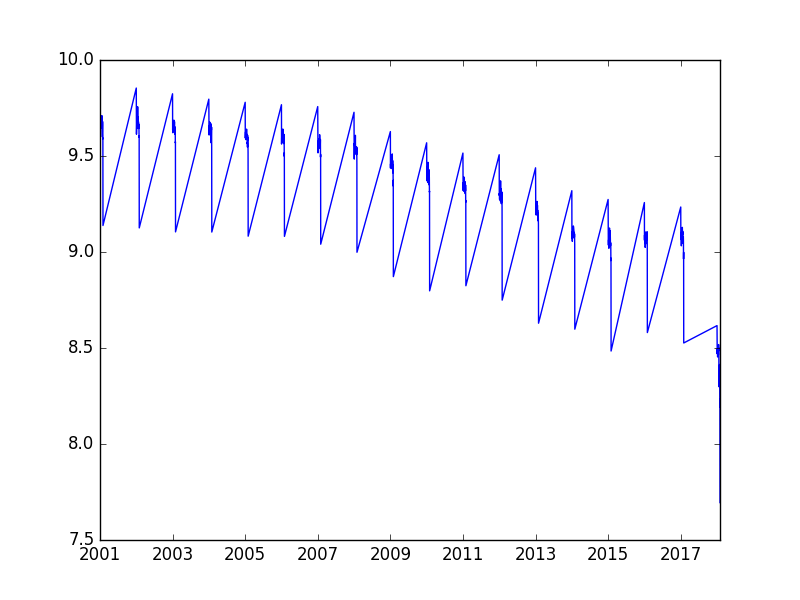

In [30]:
ts_log = np.log(x)

fig,ax = plt.subplots()
ax.plot(ts_log)
display(fig)


Plotting moving average

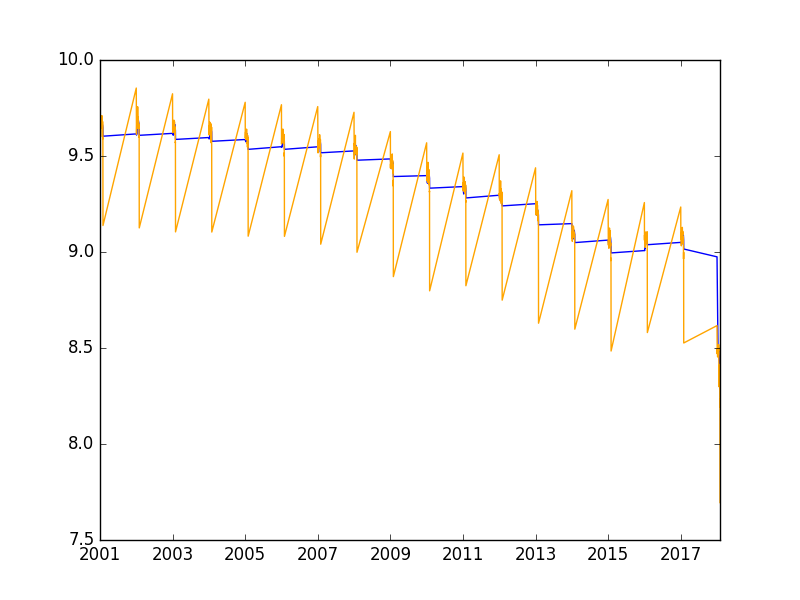

In [32]:

moving_avg = pd.rolling_mean(ts_log,12)

#plt.plot(ts_log)
#plt.plot(moving_avg, color='red')
# display()

fig,ax = plt.subplots()
ax.plot(moving_avg,color='blue')
ax.plot(ts_log, color='orange')
display(fig)

Subtract rolling average

In [34]:

ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

Out[ 20 ]: 
new_date
2001-01-01 NaN
2001-01-02 NaN
2001-01-03 NaN
2001-01-04 NaN
2001-01-05 NaN
2001-01-06 NaN
2001-01-07 NaN
2001-01-08 NaN
2001-01-09 NaN
2001-01-10 NaN
2001-01-11 NaN
2001-01-12 -0.007831
Name: count, dtype: float64

Removing null values and plotting time series log moving average difference

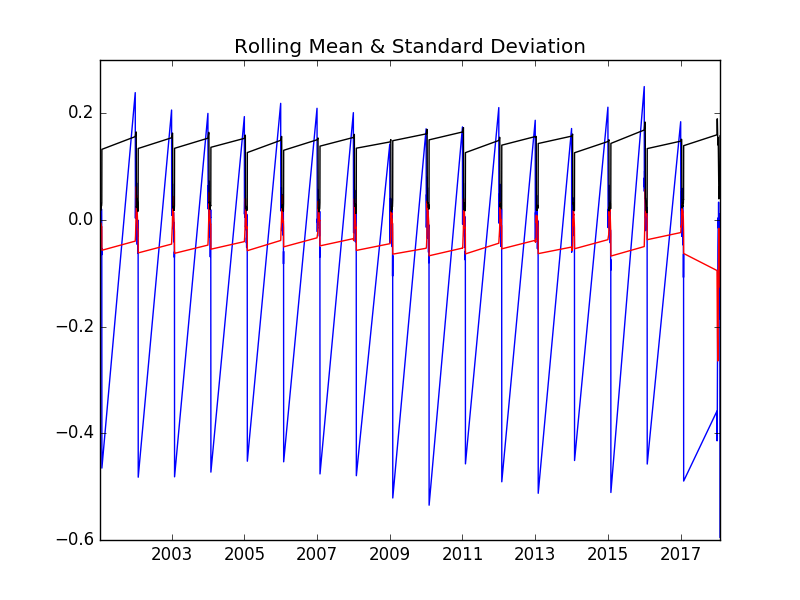

In [36]:
ts_log_moving_avg_diff.dropna(inplace=True)
check_stationarity_graph(ts_log_moving_avg_diff)


Our p-value comes out to be less than 0.01, meaning our time series plot is stationary

In [38]:
check_stationarity_data(ts_log_moving_avg_diff)

Results of Dickey-Fuller Test:
Test Statistic -8.039803e+00
p-value 1.860186e-12
#Lags Used 3.000000e+00
Number of Observations Used 5.430000e+02
Critical Value (5%) -2.866877e+00
Critical Value (1%) -3.442450e+00
Critical Value (10%) -2.569613e+00
dtype: float64

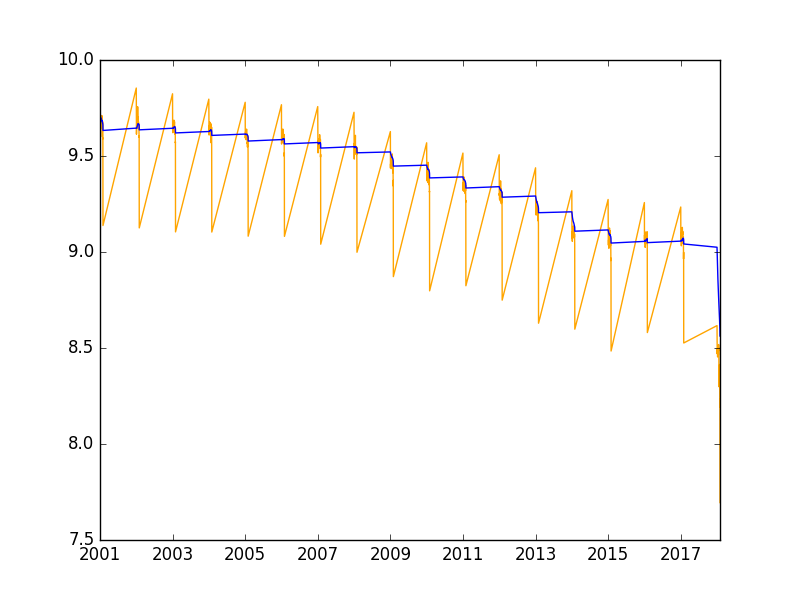

In [39]:
expwighted_avg = pd.ewma(ts_log, halflife=17)
# plt.plot(ts_log)
# plt.plot(expwighted_avg, color='red')
# display()

fig,ax = plt.subplots()
ax.plot(ts_log, color='orange')
ax.plot(expwighted_avg,color='blue')
display(fig)

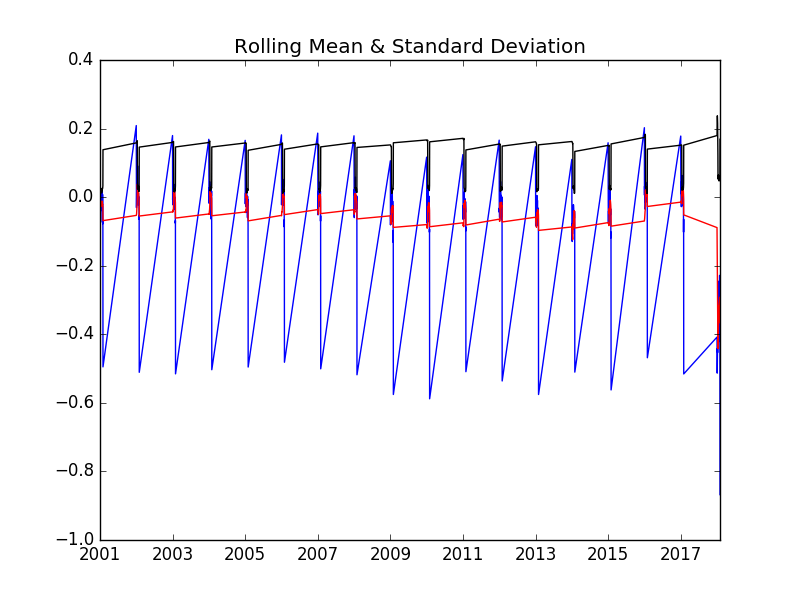

In [40]:
ts_log_ewma_diff = ts_log - expwighted_avg
check_stationarity_graph(ts_log_ewma_diff)

In [41]:
check_stationarity_data(ts_log_ewma_diff)

Results of Dickey-Fuller Test:
Test Statistic -2.797224
p-value 0.058671
#Lags Used 5.000000
Number of Observations Used 552.000000
Critical Value (5%) -2.866790
Critical Value (1%) -3.442252
Critical Value (10%) -2.569566
dtype: float64

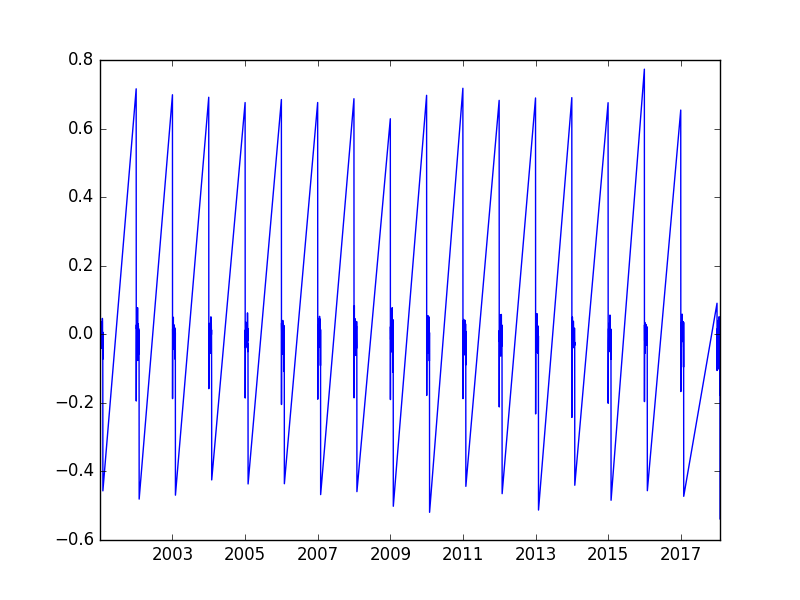

In [42]:
ts_log_diff = ts_log - ts_log.shift()
# plt.plot(ts_log_diff)
# display()

fig,ax = plt.subplots()
ax.plot(ts_log_diff)
display(fig)



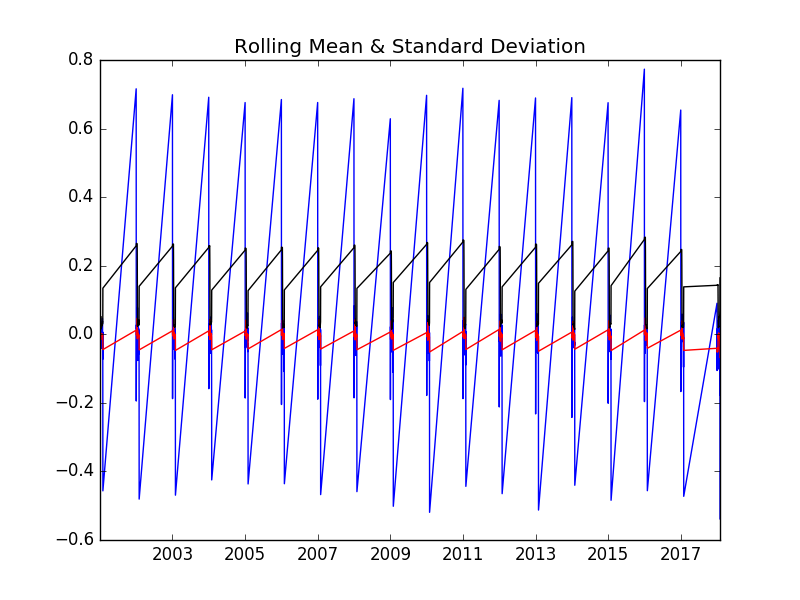

In [43]:
ts_log_diff.dropna(inplace=True)
check_stationarity_graph(ts_log_diff)

In [44]:
check_stationarity_data(ts_log_diff)

Results of Dickey-Fuller Test:
Test Statistic -1.591900e+01
p-value 7.963558e-29
#Lags Used 4.000000e+00
Number of Observations Used 5.520000e+02
Critical Value (5%) -2.866790e+00
Critical Value (1%) -3.442252e+00
Critical Value (10%) -2.569566e+00
dtype: float64

ACF (autocorrelation function) and PACF (partial autocorrelation function) plots:

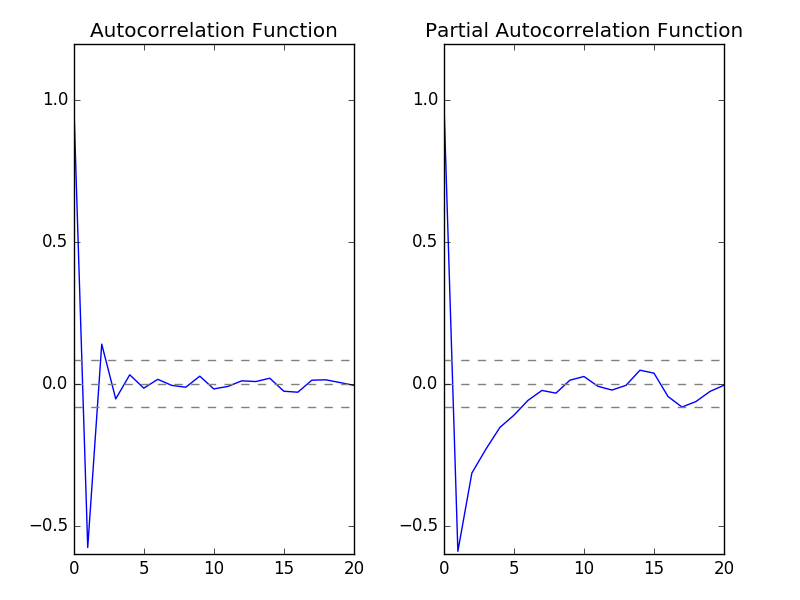

In [46]:

lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

# Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

# Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
display()


ARIMA AR (auto-regression) forecasting model

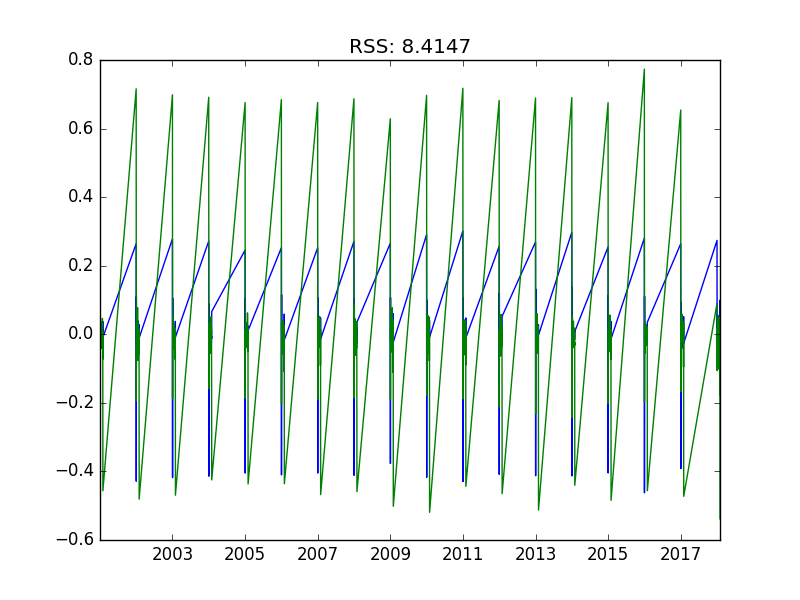

In [48]:

model = ARIMA(ts_log, order=(1, 1, 0))  # (p,d,q)
results_AR = model.fit(disp=-1)  
# plt.plot(ts_log_diff)
# plt.plot(results_AR.fittedvalues, color='red')
fig,ax = plt.subplots()
ax.plot(results_AR.fittedvalues)
ax.plot(ts_log_diff)
ax.set_title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))
display(fig)


# Print the RSS- values for the residuals

# display()

ARIMA Moving Average time series forecasting model

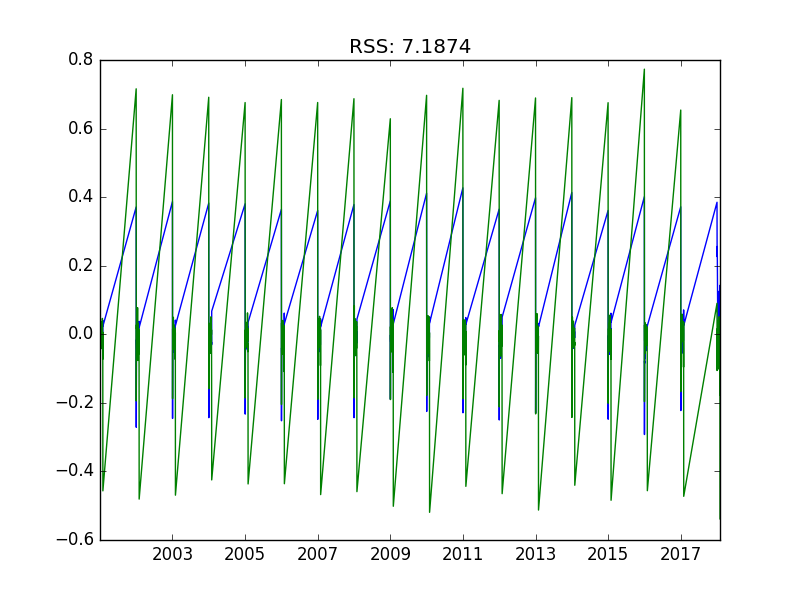

In [50]:

model = ARIMA(ts_log, order=(0, 1, 1))  
results_MA = model.fit(disp=-1)  
# plt.plot(ts_log_diff)
# plt.plot(results_MA.fittedvalues, color='red')

fig,ax = plt.subplots()
ax.plot(results_MA.fittedvalues)
ax.plot(ts_log_diff)
ax.set_title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))
display(fig)



Combining the 2 models

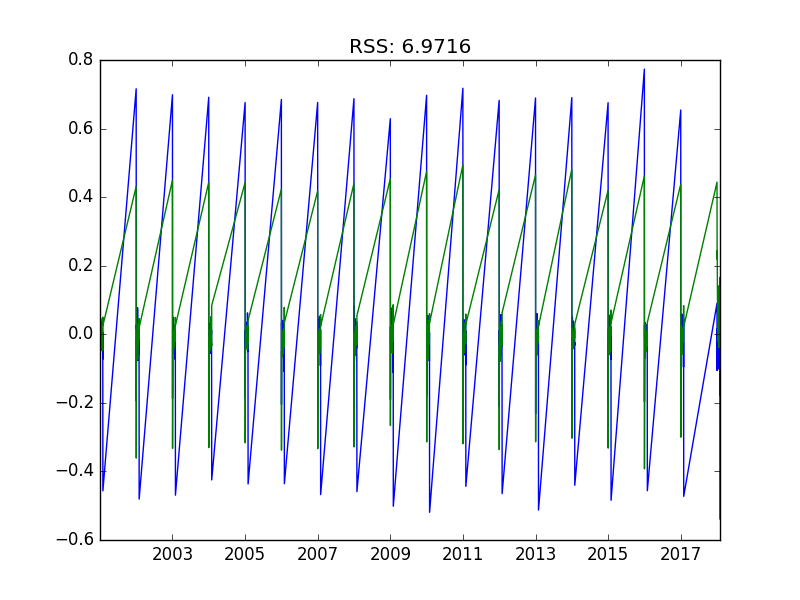

In [52]:
# Combined model
model = ARIMA(ts_log, order=(1, 1, 1))  
results_ARIMA = model.fit(disp=-1)  
# plt.plot(ts_log_diff)
# plt.plot(results_ARIMA.fittedvalues, color='red')
# plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

fig,ax = plt.subplots()
ax.plot(ts_log_diff)
ax.plot(results_ARIMA.fittedvalues)
ax.set_title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))
display(fig)

In [53]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

new_date
2001-01-02 -0.002860
2001-01-03 0.094956
2001-01-04 0.057105
2001-01-05 0.023354
2001-01-06 0.017432
dtype: float64

In [54]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

new_date
2001-01-02 -0.002860
2001-01-03 0.092096
2001-01-04 0.149201
2001-01-05 0.172555
2001-01-06 0.189987
dtype: float64

In [55]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Out[ 35 ]: 
new_date
2001-01-01 9.848979
2001-01-02 9.846119
2001-01-03 9.941075
2001-01-04 9.998180
2001-01-05 10.021534
dtype: float64

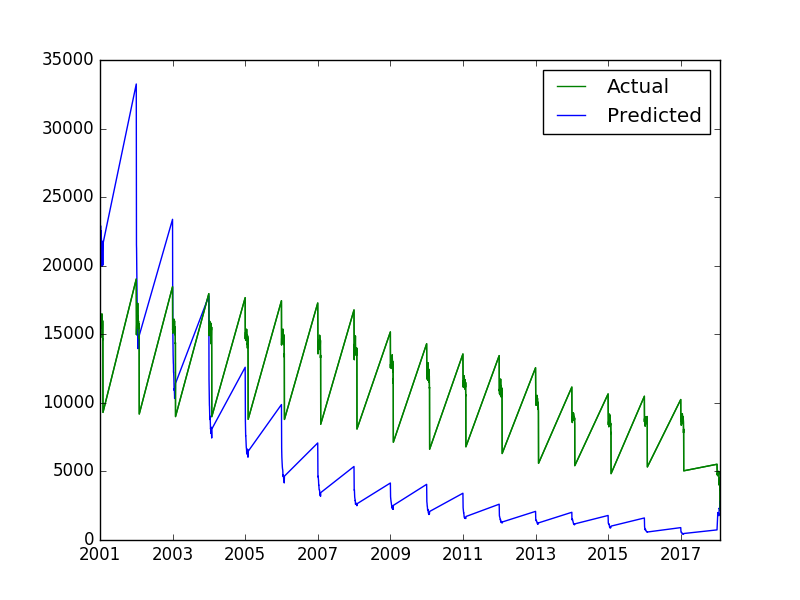

In [56]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
# plt.plot(x)
# plt.plot(predictions_ARIMA)
# plt.show()
# ax.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-x)**2)/len(x)))
# display()

fig,ax = plt.subplots()
ax.plot(x,label= 'Actual', color='green')
ax.plot(predictions_ARIMA, label='Predicted')
# ax.set_title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-x)**2)/len(x)))
ax.legend()
ax.plot(x)
display(fig)